# HBTE移相/衰减矩阵评估
## 待测件（DUT，device under test）
型号：HBTE-PA-32*08-90-0.5-1-S-R-B-F9

规格：

1. 2.3GHz ~ 5GHz
2. 相位0~359°，步进1°
3. 衰减0~90dB，步进0.5dB
4. 输入端口32口（A1~A32)，输出端口8口 (B1~B8)，N-female
5. VSWR 1.8
6. 插入损耗 47.5dB

## 评估方法
1. PNA-X N5244A，
2. 2GHz~6GHz，401points
3. IFBW=1kHz
4. Power = 10dBm
5. N4432A校准到N-female口，
6. port1连接A1，port2连接B1，
7. 控制DUT的A1B1通道，衰减0dB，相位从0°到359°，1°步进，测试360个状态的S参数
8. 控制DUT的A1B1通道，相位从0°，衰减0dB到90dB，0.5dB步进，测试180个状态的S参数
9. port1连接A2，port2连接B1，
10. 控制DUT的A2B1通道，衰减0dB，相位从0°到359°，1°步进，测试360个状态的S参数
11. 控制DUT的A2B1通道，相位从0°，衰减0dB到90dB，0.5dB步进，测试180个状态的S参数
12. 第二天再次测试A1B1,A2B1通道的相位、衰减状态

## 测试结果
### 第一天测试

S参数测试结果全部保存为S2P文件。



In [4]:
import skrf as rf
from matplotlib import pyplot as plt
import numpy as np

rf.stylely()

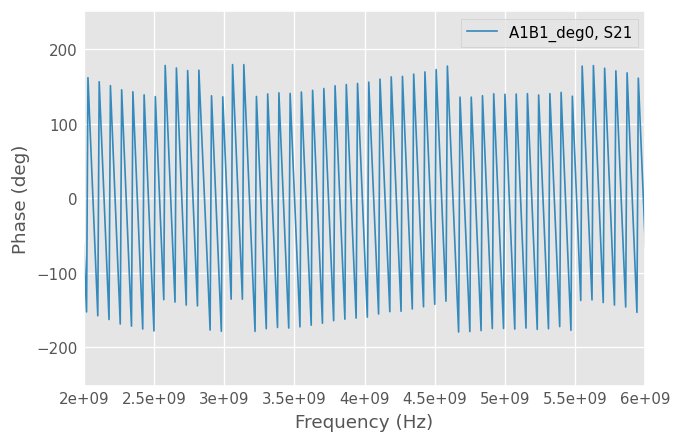

In [1]:

deg0 = rf.Network('data_20220920/A1B1_deg0.s2p')
deg1 = rf.Network('data_20220920/A1B1_deg1.s2p')

deg0.plot_s_deg(m=1,n=0)


#### 插入损耗
下面测试结果，2.3-5GHz范围内，插入损耗满足指标47.5dB

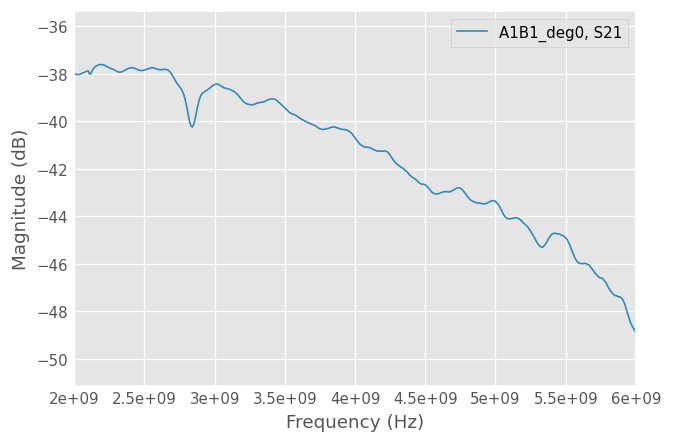

In [2]:
deg0.plot_s_db(m=1,n=0)

#### VSWR
A1端口的VSWR，在4.5GHz+超过了指标1.8，不满足指标。

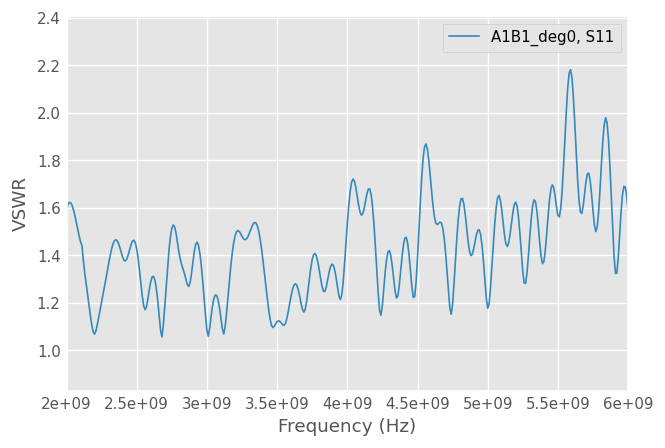

In [3]:
deg0.plot_s_vswr(m=0,n=0)

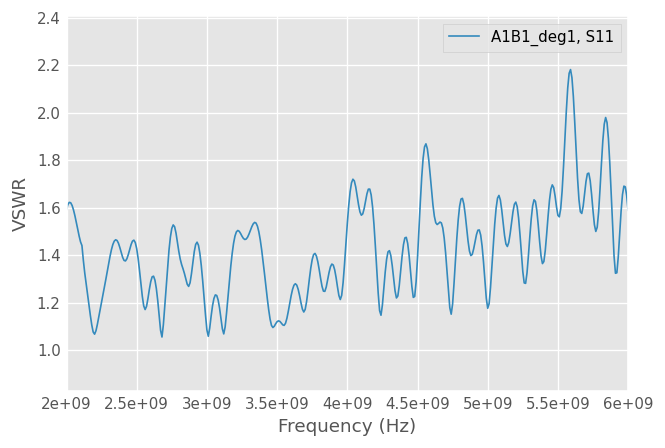

In [4]:
deg1.plot_s_vswr(m=0,n=0)

B1端口的VSWR，满足指标1.8

推测：1分32的功分器VSWR指标更差，1分8的功分器明显更好。

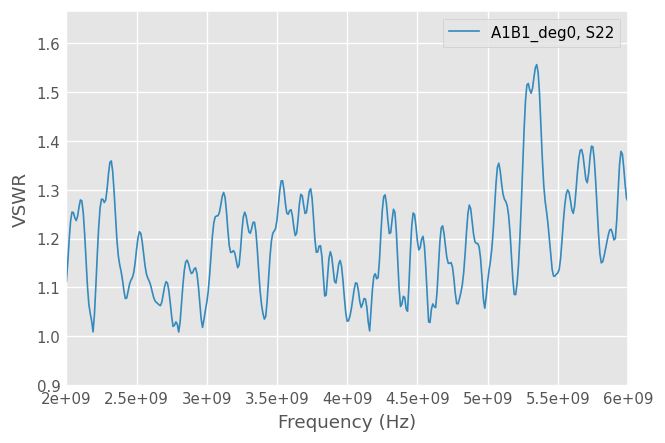

In [5]:
deg0.plot_s_vswr(m=1,n=1)

#### 相位步进
步进1°的相位相对于0°的相位，可以看到约等于1°的变化，不同频点的变化趋势。

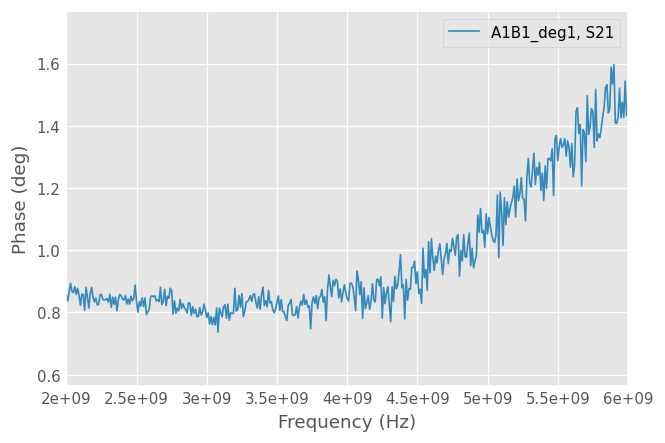

In [6]:
diff = deg1/ deg0
diff.plot_s_deg(m=1,n=0)

步进1°的幅度相对于0°的幅度，可以看到1°的变化，插入损耗基本不会变化。

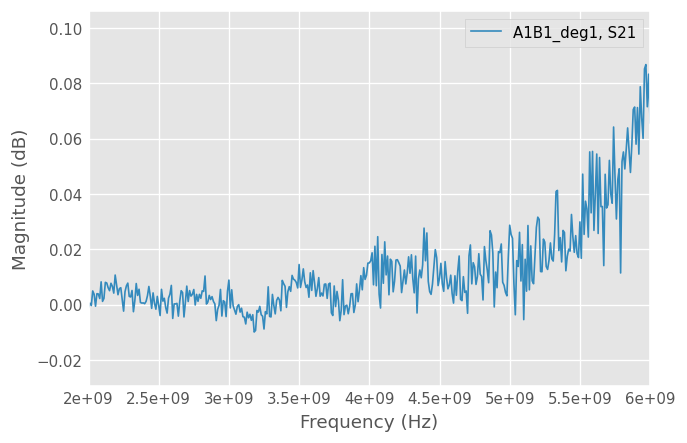

In [7]:
diff.plot_s_db(m=1,n=0)

#### 连续相位步进
将A1B1通道，头10个相位步进状态进行分析。

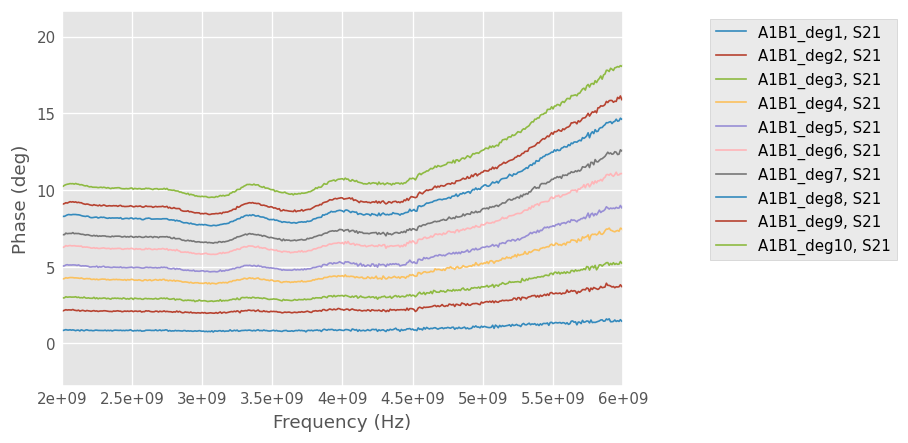

In [8]:
s2p_ref = rf.Network('data_20220920/A1B1_deg' + str(0)+ '.s2p')
for deg in range(10):
    s2p = rf.Network('data_20220920/A1B1_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
plt.legend(bbox_to_anchor=(1.5, 1.0))

步进间距大概都是1°，都归一化到上一个相位步进状态，观察1-0,2-1,3-2等等的相位差异。发现由明显的不连续变化。一部分间距明显低于1°，一部分明显大于1°。

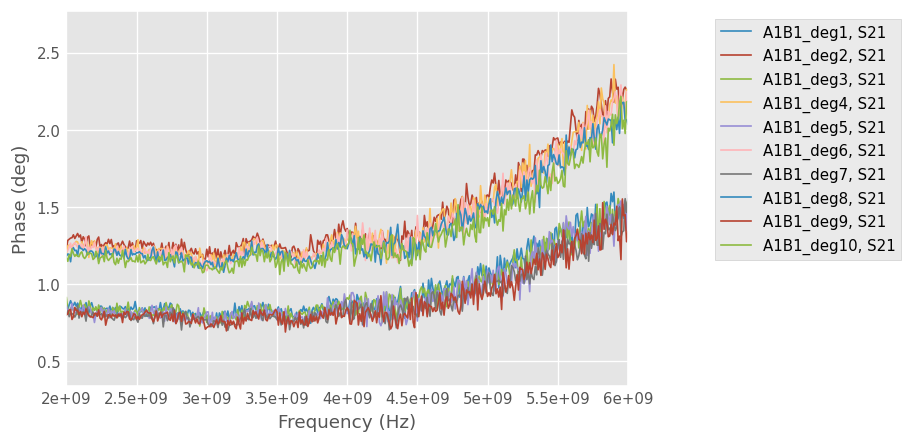

In [9]:
s2p_ref = rf.Network('data_20220920/A1B1_deg' + str(0)+ '.s2p')
for deg in range(10):
    s2p = rf.Network('data_20220920/A1B1_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend(bbox_to_anchor=(1.5, 1.0))

如果只看头两个相位步进，发现第一个相位步进是低于1°，第二个相位步进大于1°。猜测奇数个步进是低于1°，偶数个是大于1°。

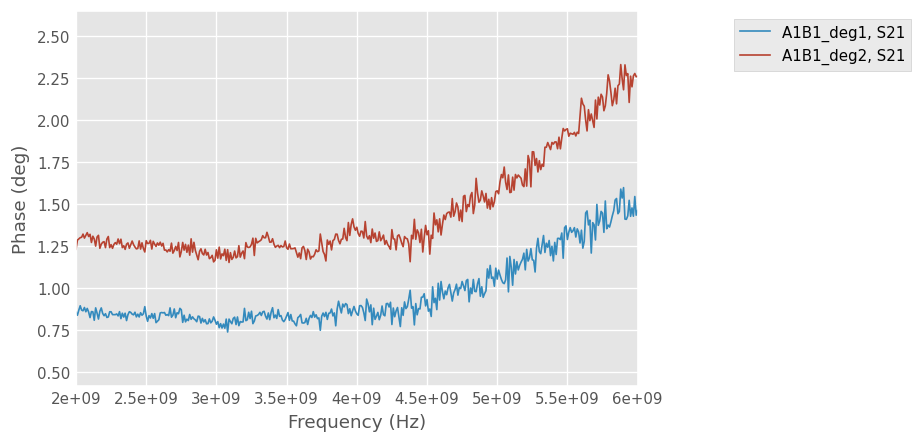

In [10]:
s2p_ref = rf.Network('data_20220920/A1B1_deg' + str(0)+ '.s2p')
for deg in range(2):
    s2p = rf.Network('data_20220920/A1B1_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend(bbox_to_anchor=(1.5, 1.0))

发现1-0，3-2，5-4，...，11-10，状态相位步进都是低于1°的

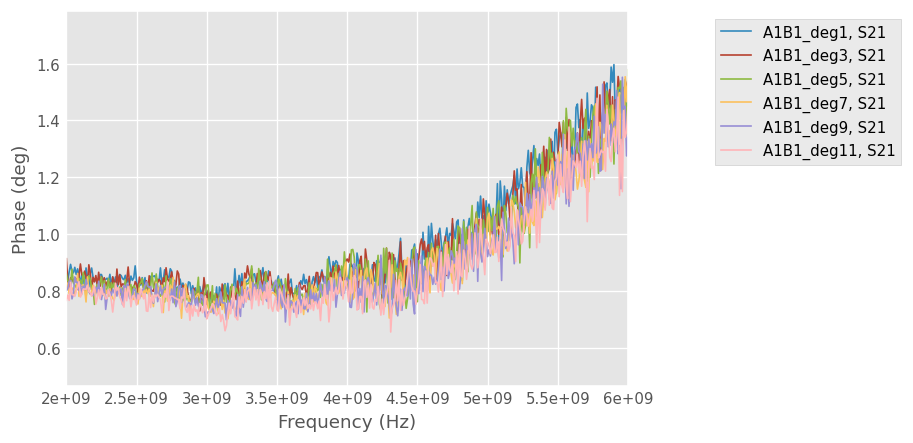

In [11]:
for deg in range(6):
    s2p_ref = rf.Network('data_20220920/A1B1_deg' + str(2*deg)+ '.s2p')
    s2p = rf.Network('data_20220920/A1B1_deg' + str(2*deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend(bbox_to_anchor=(1.5, 1.0))

发现2-1，4-3，6-5，...，12-11，状态相位步进都是大于1°的。

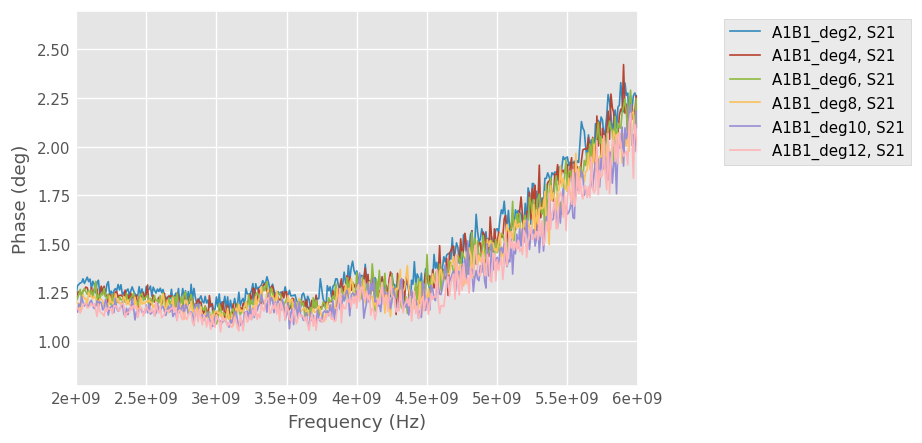

In [12]:
for deg in range(6):
    s2p_ref = rf.Network('data_20220920/A1B1_deg' + str(2*deg+1)+ '.s2p')
    s2p = rf.Network('data_20220920/A1B1_deg' + str(2*deg+2)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend(bbox_to_anchor=(1.5, 1.0))

但是这个奇数偶数规律分布仅仅在前几个步进状态成立，增加分析数量，发现奇数步进低于1°，其实并不成立。

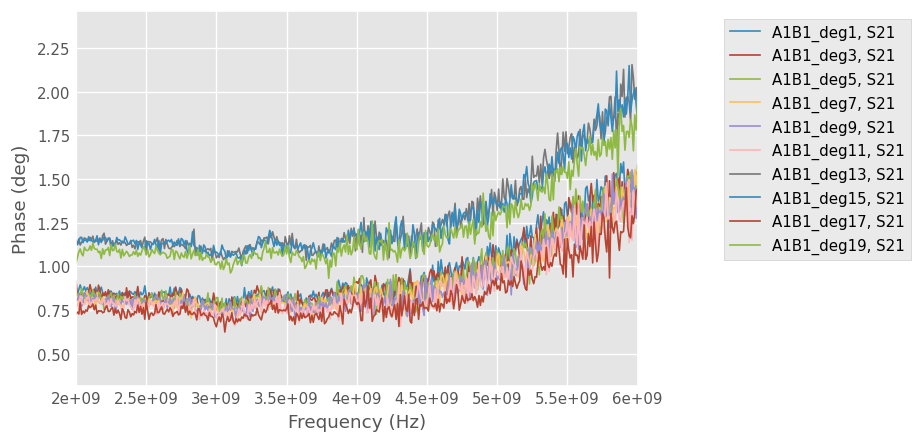

In [13]:
for deg in range(10):
    s2p_ref = rf.Network('data_20220920/A1B1_deg' + str(2*deg)+ '.s2p')
    s2p = rf.Network('data_20220920/A1B1_deg' + str(2*deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend(bbox_to_anchor=(1.5, 1.0))

分析头100个相位步进，1°间隔，相位变化情况。

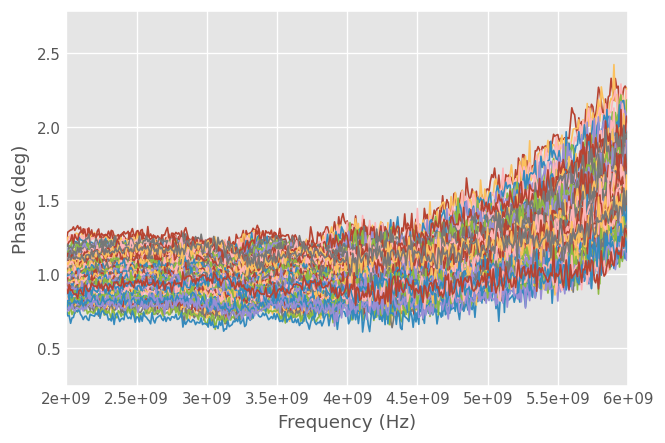

In [14]:
s2p_ref = rf.Network('data_20220920/A1B1_deg' + str(0)+ '.s2p')
for deg in range(100):
    s2p = rf.Network('data_20220920/A1B1_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

分析第100个-200个相位步进，1°间隔，相位变化情况。发现，在5.5GHz-6GHz，相位步进有到2°和0°的情况。后续测试证明不是产品问题，而是测试程序bug，触发测试后，需要增加足够的延时，保证VNA测试完成。

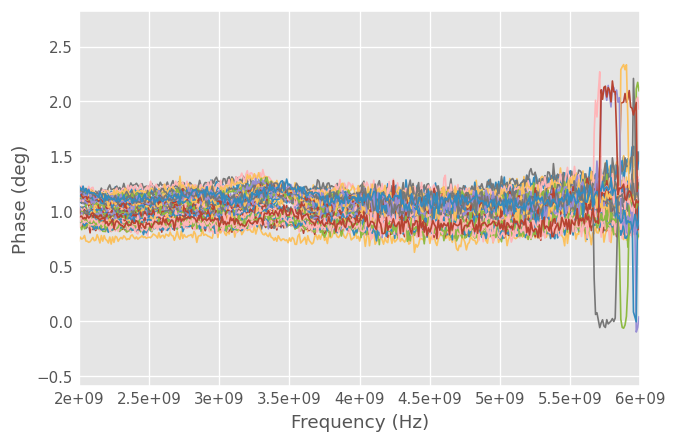

In [15]:
s2p_ref = rf.Network('data_20220920/A1B1_deg' + str(100)+ '.s2p')
for deg in range(100):
    s2p = rf.Network('data_20220920/A1B1_deg' + str(deg+101)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

分析第200个-300个相位步进，1°间隔，相位变化情况。发现，在3.8GHz-6GHz，相位步进有到2°和0°的情况。测试程序问题。

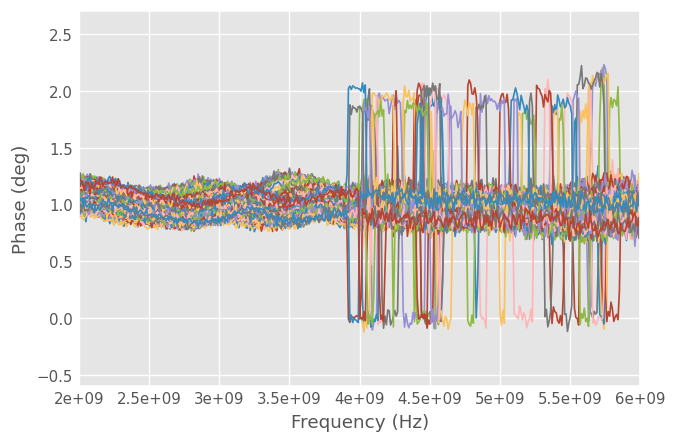

In [16]:
s2p_ref = rf.Network('data_20220920/A1B1_deg' + str(200)+ '.s2p')
for deg in range(100):
    s2p = rf.Network('data_20220920/A1B1_deg' + str(deg+201)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

分析第300个-360个相位步进，1°间隔，相位变化情况。发现，在3.0GHz-4GHz，相位步进有到2°和0°的情况。测试程序问题。

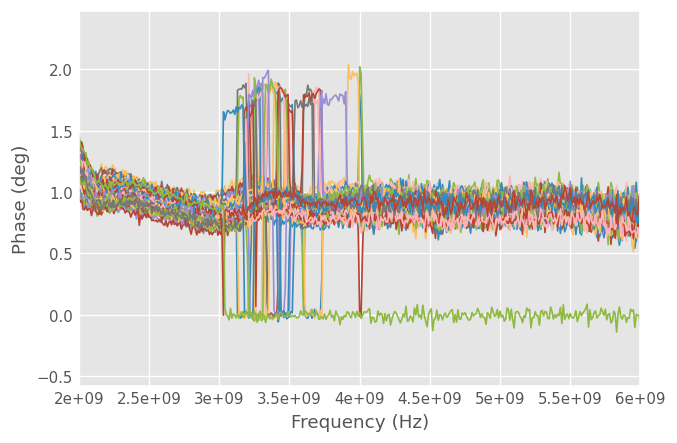

In [17]:
s2p_ref = rf.Network('data_20220920/A1B1_deg' + str(300)+ '.s2p')
for deg in range(59):
    s2p = rf.Network('data_20220920/A1B1_deg' + str(deg+301)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

观察第二天测试的结果，并没有出现这样的情况。

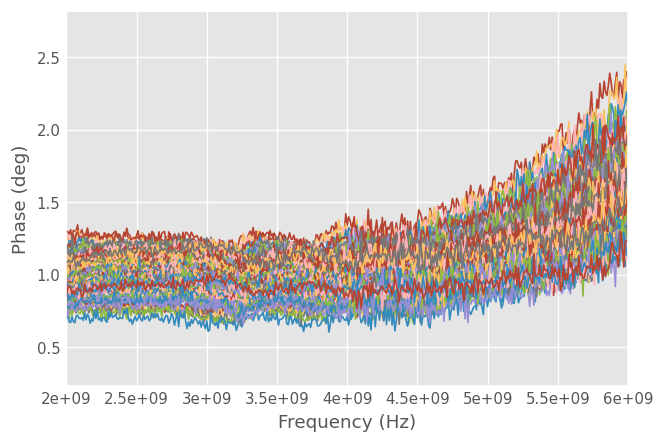

In [18]:
s2p_ref = rf.Network('data_20220921/A1B1_deg' + str(0)+ '.s2p')
for deg in range(100):
    s2p = rf.Network('data_20220921/A1B1_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

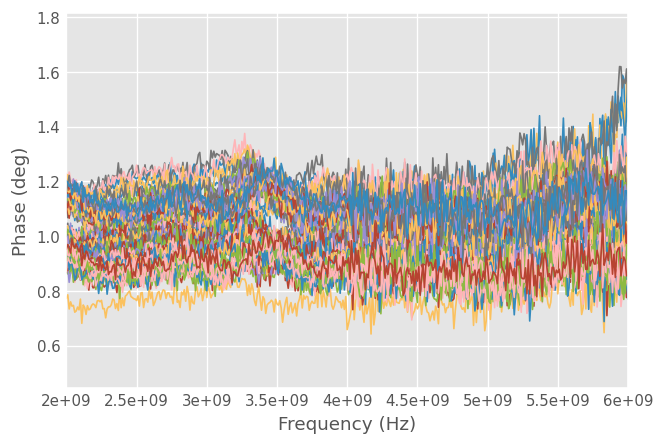

In [19]:
s2p_ref = rf.Network('data_20220921/A1B1_deg' + str(100)+ '.s2p')
for deg in range(100):
    s2p = rf.Network('data_20220921/A1B1_deg' + str(deg+101)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

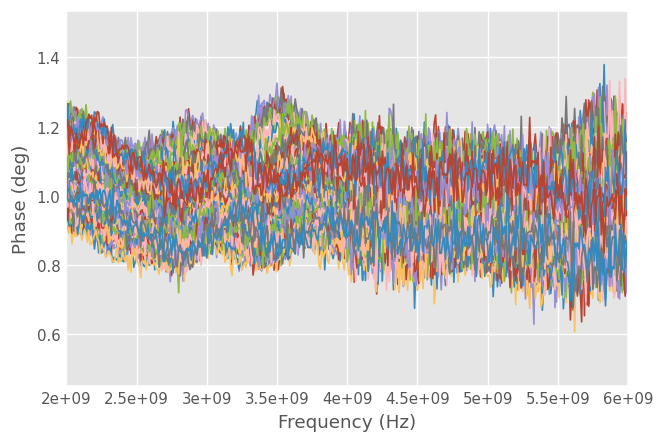

In [20]:
s2p_ref = rf.Network('data_20220921/A1B1_deg' + str(200)+ '.s2p')
for deg in range(100):
    s2p = rf.Network('data_20220921/A1B1_deg' + str(deg+201)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

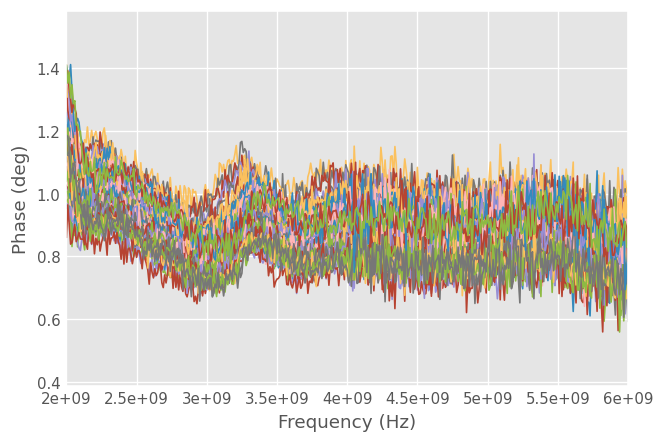

In [21]:
s2p_ref = rf.Network('data_20220921/A1B1_deg' + str(300)+ '.s2p')
for deg in range(59):
    s2p = rf.Network('data_20220921/A1B1_deg' + str(deg+301)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()
# plt.legend()

第二天，A2B1通道的相位变化情况。

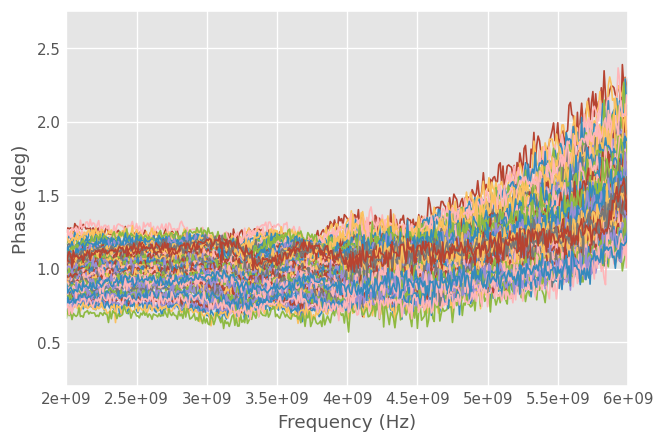

In [22]:
s2p_ref = rf.Network('data_20220921/A2B1_deg' + str(0)+ '.s2p')
for deg in range(100):
    s2p = rf.Network('data_20220921/A2B1_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

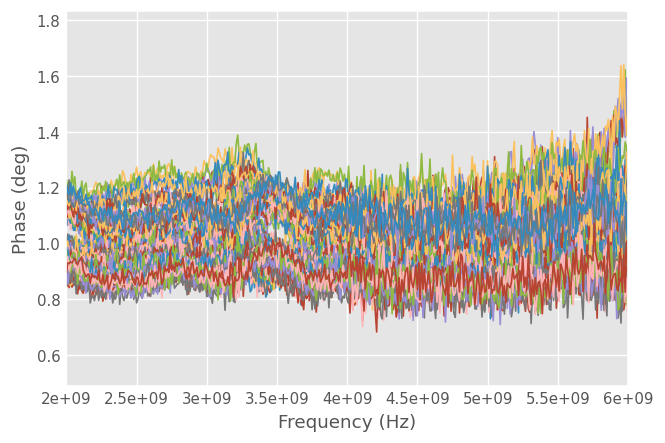

In [23]:
s2p_ref = rf.Network('data_20220921/A2B1_deg' + str(100)+ '.s2p')
for deg in range(100):
    s2p = rf.Network('data_20220921/A2B1_deg' + str(deg+101)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

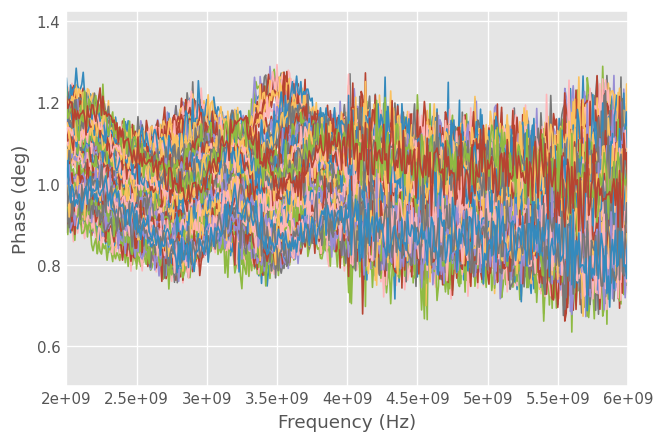

In [24]:
s2p_ref = rf.Network('data_20220921/A2B1_deg' + str(200)+ '.s2p')
for deg in range(100):
    s2p = rf.Network('data_20220921/A2B1_deg' + str(deg+201)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

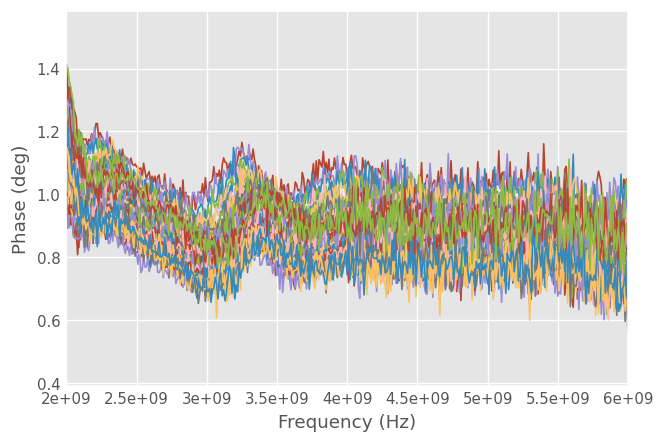

In [25]:
s2p_ref = rf.Network('data_20220921/A2B1_deg' + str(300)+ '.s2p')
for deg in range(59):
    s2p = rf.Network('data_20220921/A2B1_deg' + str(deg+301)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

第一天，A2B1通道的情况。感觉第一天的数据都有问题。第二天均没有复现。

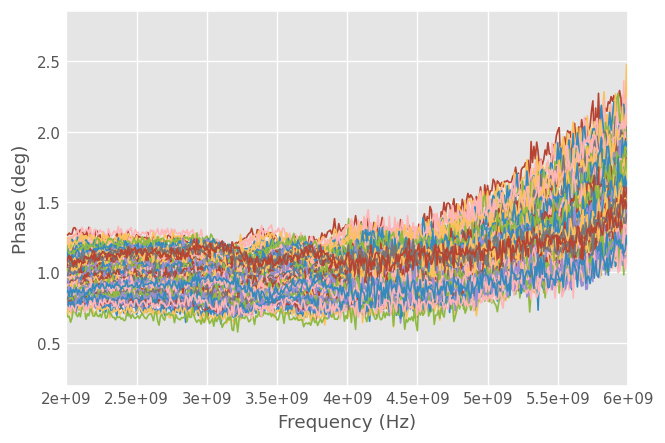

In [28]:
s2p_ref = rf.Network('data_20220920/A2B1_deg' + str(0)+ '.s2p')
for deg in range(100):
    s2p = rf.Network('data_20220920/A2B1_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

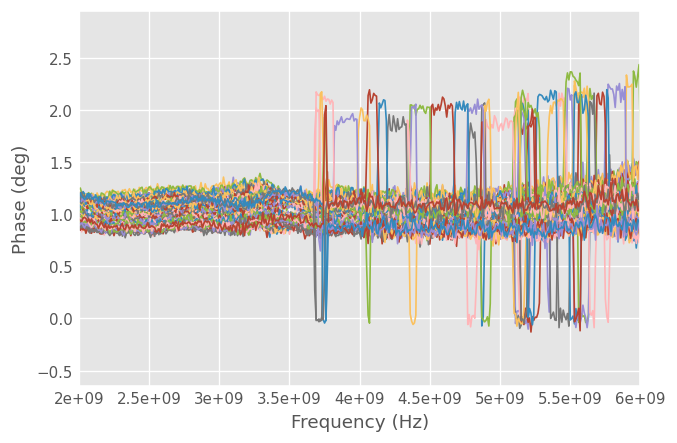

In [27]:
s2p_ref = rf.Network('data_20220920/A2B1_deg' + str(100)+ '.s2p')
for deg in range(100):
    s2p = rf.Network('data_20220920/A2B1_deg' + str(deg+101)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

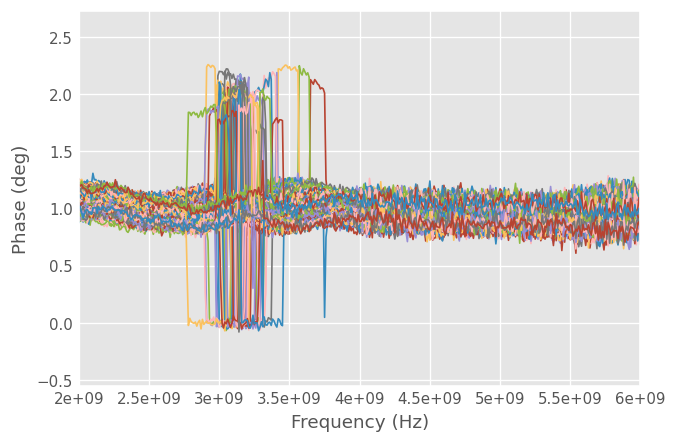

In [26]:
s2p_ref = rf.Network('data_20220920/A2B1_deg' + str(200)+ '.s2p')
for deg in range(100):
    s2p = rf.Network('data_20220920/A2B1_deg' + str(deg+201)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

### 第二天测试

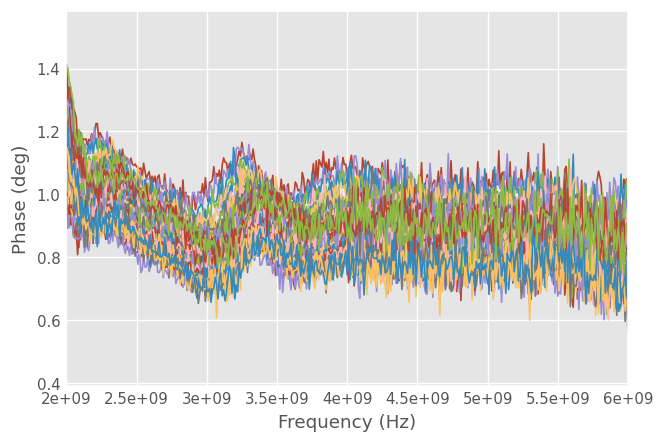

In [29]:
s2p_ref = rf.Network('data_20220921/A2B1_deg' + str(300)+ '.s2p')
for deg in range(59):
    s2p = rf.Network('data_20220921/A2B1_deg' + str(deg+301)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

0921(第二天)第二轮测试的情况，再次出现了数据异常情况。

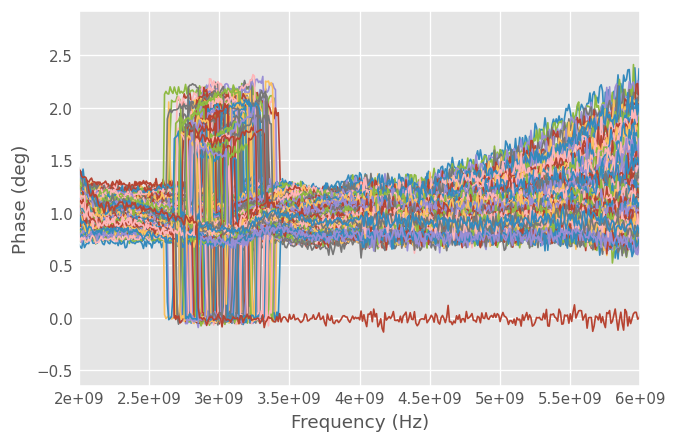

In [30]:
s2p_ref = rf.Network('data_20220921/A1B1_r2_deg' + str(0)+ '.s2p')
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r2_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

0921(第二天)第3轮测试的情况，再次出现了数据异常情况。

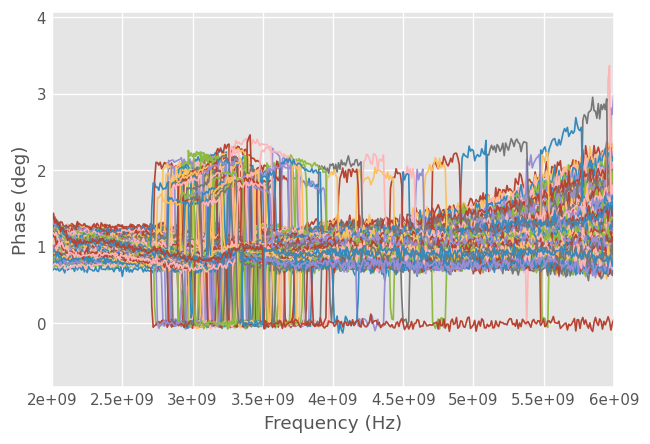

In [31]:
s2p_ref = rf.Network('data_20220921/A1B1_r3_deg' + str(0)+ '.s2p')
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r3_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

0921(第二天)第4轮测试的情况，增加了时延，数据异常情况消失。

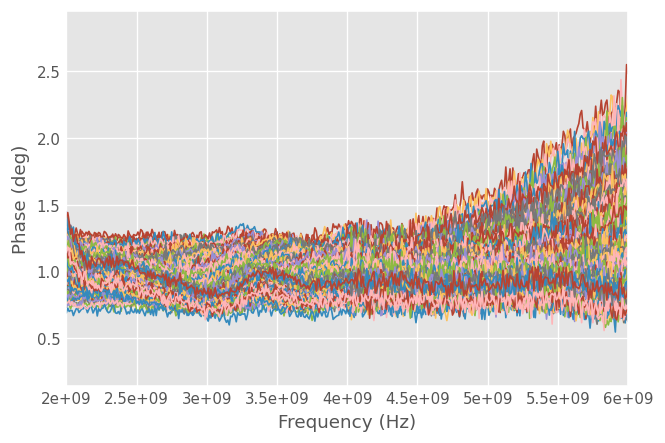

In [32]:
s2p_ref = rf.Network('data_20220921/A1B1_r4_deg' + str(0)+ '.s2p')
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r4_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

0921(第二天)第5轮测试的情况，增加时延，数据异常情况消失。

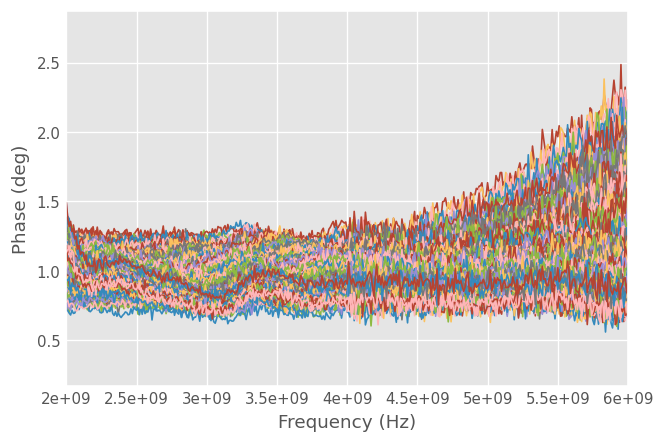

In [33]:
s2p_ref = rf.Network('data_20220921/A1B1_r5_deg' + str(0)+ '.s2p')
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r5_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

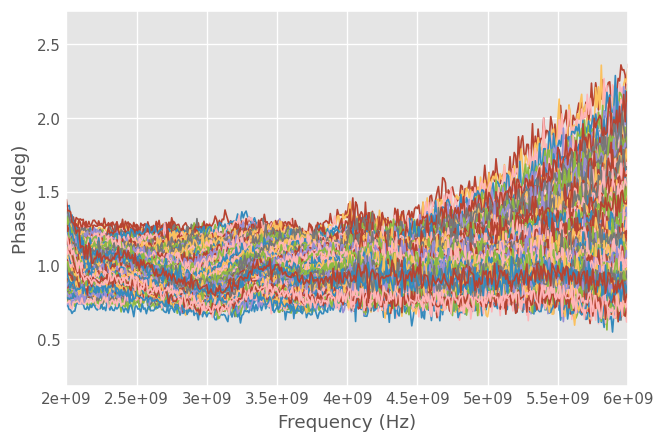

In [44]:
s2p_ref = rf.Network('data_20220921/A1B1_r6_deg' + str(0)+ '.s2p')
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r6_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

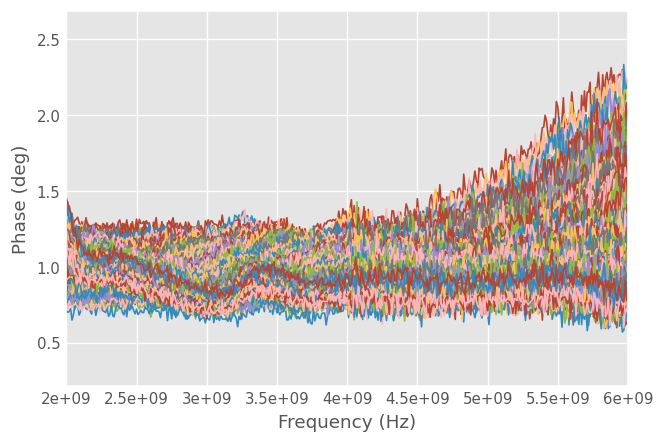

In [77]:
s2p_ref = rf.Network('data_20220921/A1B1_r7_deg' + str(0)+ '.s2p')
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r7_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

第三天，测试数据正常

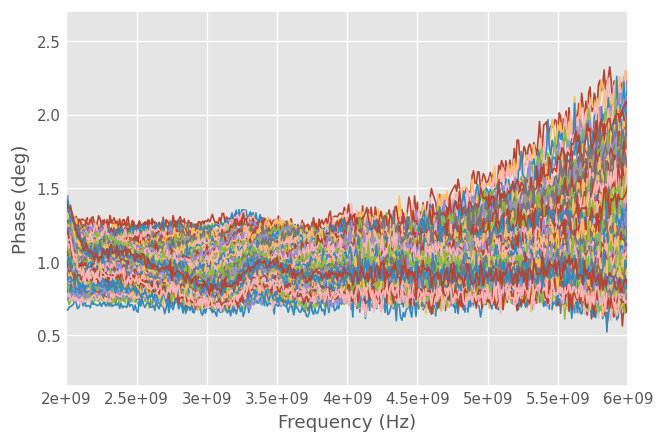

In [7]:
s2p_ref = rf.Network('data_20220922/A1B1_r1_deg' + str(0)+ '.s2p')
for deg in range(359):
    s2p = rf.Network('data_20220922/A1B1_r1_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

第4天，测试数据在329度-330度有一个异常。采用手动测试，可以完全复现这一结果。昨天，用厂家提供的校准箱和校准软件，校准后到底发生了什么变化？

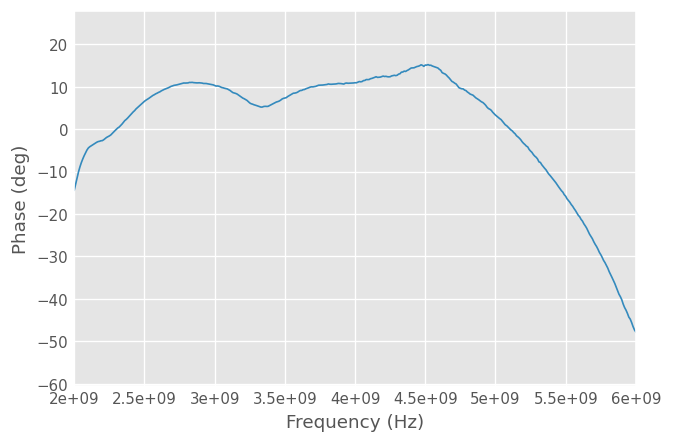

In [32]:
s2p_ref = rf.Network('data_20220923/A1B1_r1_deg' + str(329)+ '.s2p')
s2p = rf.Network('data_20220923/A1B1_r1_deg' + str(330)+ '.s2p')
diff = s2p/s2p_ref
diff.plot_s_deg(m=1,n=0)

plt.legend().remove()

刨除掉330-329度的结果，其他都是正常的。

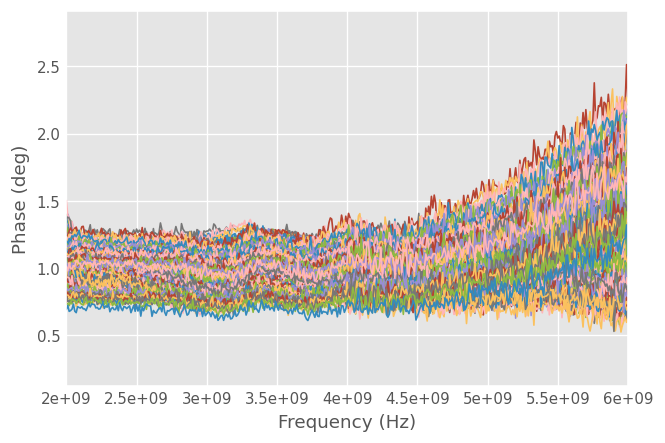

In [21]:
s2p_ref = rf.Network('data_20220923/A1B1_r1_deg' + str(0)+ '.s2p')
for deg in range(329):
    s2p = rf.Network('data_20220923/A1B1_r1_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
    
s2p_ref = rf.Network('data_20220923/A1B1_r1_deg' + str(330)+ '.s2p')
for deg in range(29):
    s2p = rf.Network('data_20220923/A1B1_r1_deg' + str(deg+331)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

A2B1通道在309-308度有同样的问题，就是相位跳变的问题。

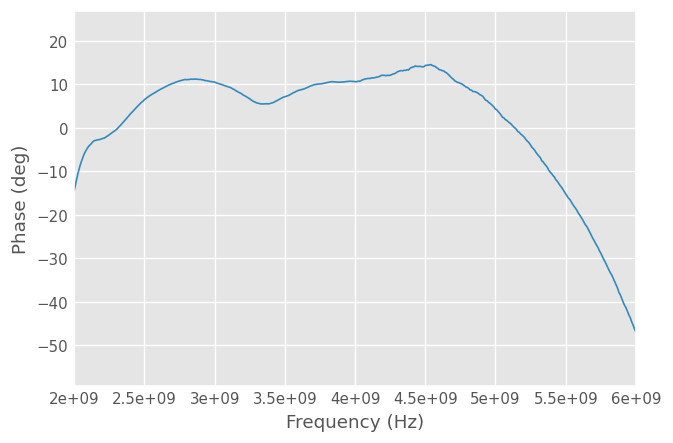

In [36]:
s2p_ref = rf.Network('data_20220923/A2B1_r1_deg' + str(308)+ '.s2p')
s2p = rf.Network('data_20220923/A2B1_r1_deg' + str(309)+ '.s2p')
diff = s2p/s2p_ref
diff.plot_s_deg(m=1,n=0)

plt.legend().remove()

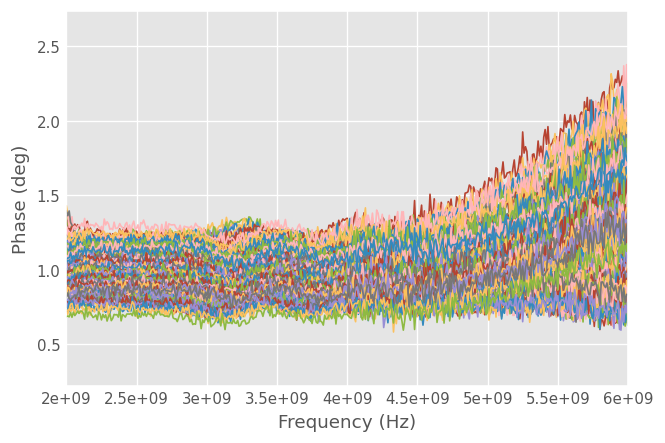

In [39]:
s2p_ref = rf.Network('data_20220923/A2B1_r1_deg' + str(0)+ '.s2p')
for deg in range(308):
    s2p = rf.Network('data_20220923/A2B1_r1_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
s2p_ref = rf.Network('data_20220923/A2B1_r1_deg' + str(309)+ '.s2p')
for deg in range(50):
    s2p = rf.Network('data_20220923/A2B1_r1_deg' + str(deg+310)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

上面用的是2350MHz的校准频点。如果采用2600MHz的校准频点，是下面的结果，同样有相位跳变的问题。

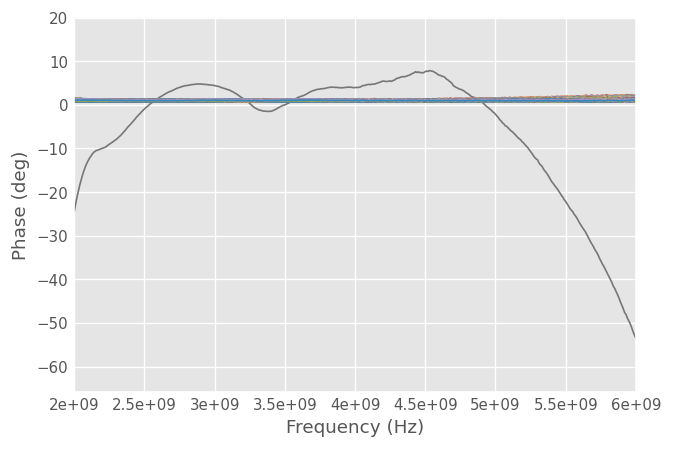

In [40]:
s2p_ref = rf.Network('data_20220923/A2B1_r2_deg' + str(0)+ '.s2p')
for deg in range(359):
    s2p = rf.Network('data_20220923/A2B1_r2_deg' + str(deg+1)+ '.s2p')
    diff = s2p/s2p_ref
    diff.plot_s_deg(m=1,n=0)
    s2p_ref = s2p
plt.legend().remove()

单独看一个频点的相位变化情况，比如2350MHz。2GHz-6GHz,401个点，10Mhz步进，所以，2350MHz就是第36个频点。

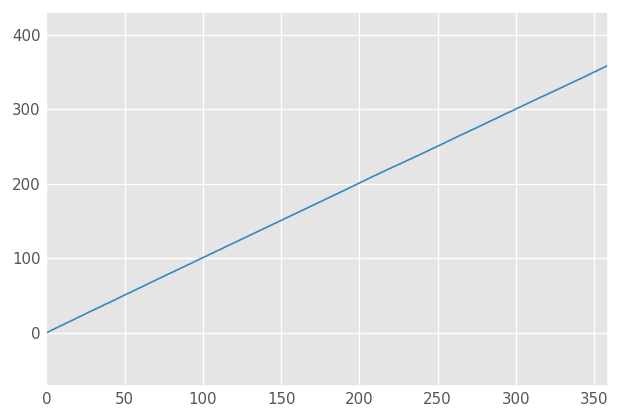

In [73]:
s2p_ref = rf.Network('data_20220921/A1B1_r6_deg' + str(0)+ '.s2p')
phase_diff = [0]
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r6_deg' + str(deg+1)+ '.s2p')
    # 第36个频点的S21
    diff = s2p.s[35:36,1,0][0]/s2p_ref.s[35:36,1,0][0]
    phase_diff.append(diff)
    # s2p_ref = s2p

lin_phase = np.angle(phase_diff, deg=True)
lin_phase_unwrap = np.unwrap(lin_phase, period=360)
plt.plot(lin_phase_unwrap)



上面图为相位绝对值，无法看到误差情况。下图，可以看到2350Mhz，360个频率步进下，相位误差的波动情况。

Text(0.5, 1.0, '2350MHz phase error')

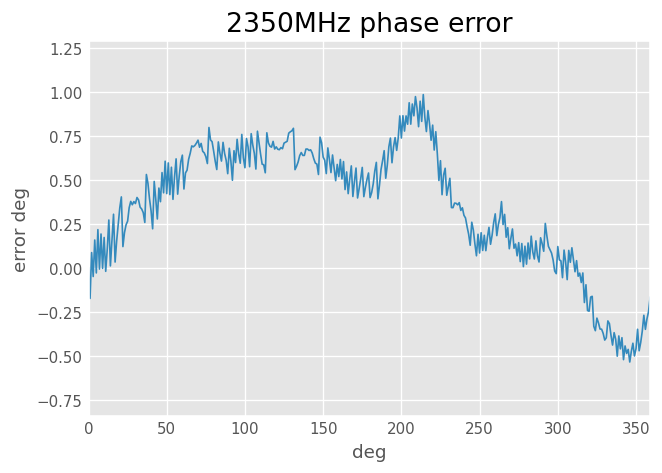

In [76]:
lst = list(range(0,360))
plt.plot(lin_phase_unwrap-lst)
plt.xlabel('deg')
plt.ylabel('error deg')
plt.title('2350MHz phase error')

2550Mhz，360个频率步进下，相位误差的波动情况。第6轮测试，明显波动很大，大于相位调节步进值。

Text(0.5, 1.0, '2550MHz phase error')

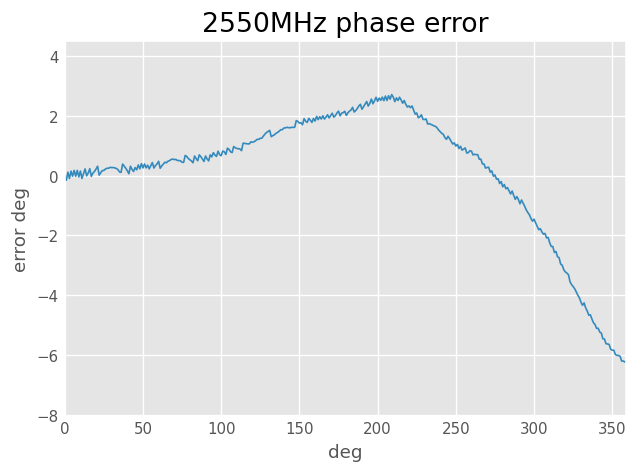

In [80]:
s2p_ref = rf.Network('data_20220921/A1B1_r6_deg' + str(0)+ '.s2p')
phase_diff = [0]
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r6_deg' + str(deg+1)+ '.s2p')
    # 第36个频点的S21
    diff = s2p.s[55:56,1,0][0]/s2p_ref.s[55:56,1,0][0]
    phase_diff.append(diff)
    # s2p_ref = s2p

lin_phase = np.angle(phase_diff, deg=True)
lin_phase_unwrap = np.unwrap(lin_phase, period=360)
# plt.plot(lin_phase_unwrap)
lst = list(range(0,360))
plt.plot(lin_phase_unwrap-lst)
plt.xlabel('deg')
plt.ylabel('error deg')
plt.title('2550MHz phase error')

第5轮测试

Text(0.5, 1.0, '2550MHz phase error')

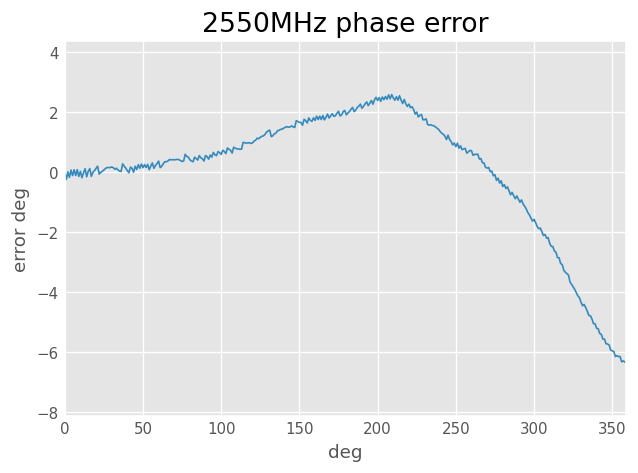

In [81]:
s2p_ref = rf.Network('data_20220921/A1B1_r5_deg' + str(0)+ '.s2p')
phase_diff = [0]
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r5_deg' + str(deg+1)+ '.s2p')
    # 第36个频点的S21
    diff = s2p.s[55:56,1,0][0]/s2p_ref.s[55:56,1,0][0]
    phase_diff.append(diff)
    # s2p_ref = s2p

lin_phase = np.angle(phase_diff, deg=True)
lin_phase_unwrap = np.unwrap(lin_phase, period=360)
# plt.plot(lin_phase_unwrap)
lst = list(range(0,360))
plt.plot(lin_phase_unwrap-lst)
plt.xlabel('deg')
plt.ylabel('error deg')
plt.title('2550MHz phase error')

3500Mhz，360个频率步进下，相位误差的波动情况。第5轮测试，明显波动很大，大于相位调节步进值。

Text(0.5, 1.0, '3500MHz phase error')

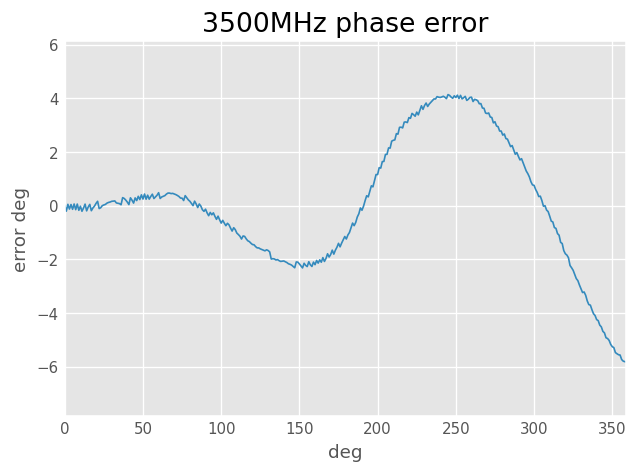

In [82]:
s2p_ref = rf.Network('data_20220921/A1B1_r5_deg' + str(0)+ '.s2p')
phase_diff = [0]
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r5_deg' + str(deg+1)+ '.s2p')
    # 第36个频点的S21
    diff = s2p.s[150:151,1,0][0]/s2p_ref.s[150:151,1,0][0]
    phase_diff.append(diff)
    # s2p_ref = s2p

lin_phase = np.angle(phase_diff, deg=True)
lin_phase_unwrap = np.unwrap(lin_phase, period=360)
# plt.plot(lin_phase_unwrap)
lst = list(range(0,360))
plt.plot(lin_phase_unwrap-lst)
plt.xlabel('deg')
plt.ylabel('error deg')
plt.title('3500MHz phase error')

5000Mhz，360个频率步进下，相位误差的波动情况。第5轮测试，明显波动很大，大于相位调节步进值。

Text(0.5, 1.0, '5000MHz phase error')

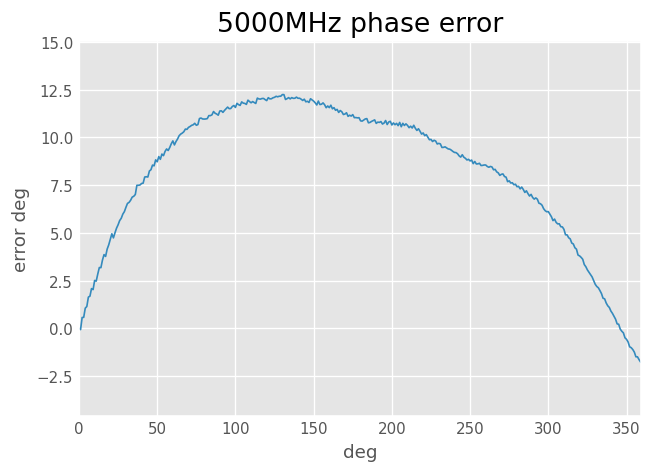

In [83]:
s2p_ref = rf.Network('data_20220921/A1B1_r5_deg' + str(0)+ '.s2p')
phase_diff = [0]
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r5_deg' + str(deg+1)+ '.s2p')
    # 第36个频点的S21
    diff = s2p.s[300:301,1,0][0]/s2p_ref.s[300:301,1,0][0]
    phase_diff.append(diff)
    # s2p_ref = s2p

lin_phase = np.angle(phase_diff, deg=True)
lin_phase_unwrap = np.unwrap(lin_phase, period=360)
# plt.plot(lin_phase_unwrap)
lst = list(range(0,360))
plt.plot(lin_phase_unwrap-lst)
plt.xlabel('deg')
plt.ylabel('error deg')
plt.title('5000MHz phase error')

当然，我们测试了全部频点的所有相位步进，我们可以利用这些测试数据，生成特定频点的校准数据，用于修正过大的相位误差。

思路，特点频点上，比如5000MHz，以0deg为基准，比如在phase shifter = +65° 相位误差为+10°，那么就在+65°位置向下修正10个步进，就是10°，这样可以在固定点频进行精确修正。

下图是5000MHz，移相器1°-0°，2°-1°，...，359°-358°，的真实相位差，理论上应是一条1°的直线，因为步进值为1°，实际上开始阶段，高于1°，200度后低于1度，累加起来就导致上图的情况，绝对相位误差先上升，后下降。

Text(0.5, 1.0, '5000MHz phase step')

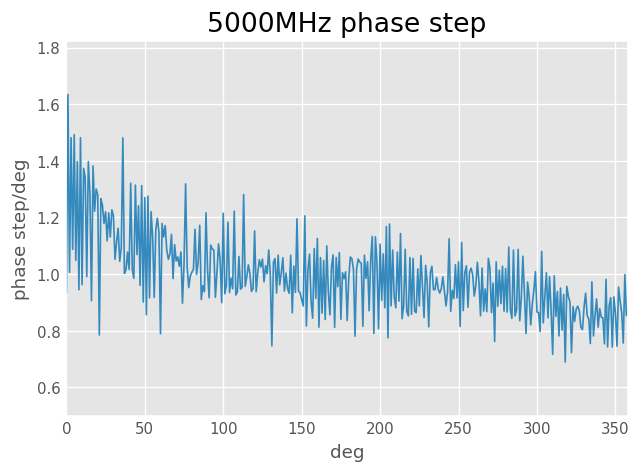

In [86]:
s2p_ref = rf.Network('data_20220921/A1B1_r5_deg' + str(0)+ '.s2p')
phase_diff = [0]
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r5_deg' + str(deg+1)+ '.s2p')
    # 第36个频点的S21
    diff = s2p.s[300:301,1,0][0]/s2p_ref.s[300:301,1,0][0]
    phase_diff.append(diff)
    s2p_ref = s2p

lin_phase = np.angle(phase_diff, deg=True)
lin_phase_unwrap = np.unwrap(lin_phase, period=360)
# plt.plot(lin_phase_unwrap)
# lst = list(range(0,360))
plt.plot(lin_phase_unwrap[1:360])
plt.xlabel('deg')
plt.ylabel('phase step/deg')
plt.title('5000MHz phase step')

生成校准数据5000MHz_phase_cal.csv

In [9]:
s2p_ref = rf.Network('data_20220921/A1B1_r5_deg' + str(0)+ '.s2p')
phase_diff = [0]
for deg in range(359):
    s2p = rf.Network('data_20220921/A1B1_r5_deg' + str(deg+1)+ '.s2p')
    # 第36个频点的S21
    diff = s2p.s[300:301,1,0][0]/s2p_ref.s[300:301,1,0][0]
    phase_diff.append(diff)
    # s2p_ref = s2p

lin_phase = np.angle(phase_diff, deg=True)
lin_phase_unwrap = np.unwrap(lin_phase, period=360)
# plt.plot(lin_phase_unwrap)
lst = list(range(0,360))
phase_cal = np.around(lin_phase_unwrap-lst)
np.savetxt('5000MHz_phase_cal.csv',phase_cal, delimiter=',')

phase_cal_file = np.loadtxt('5000MHz_phase_cal.csv')


经过校准后的5GHz的相位，基本可以修正到正负1.5°之内，证明这个校准的思路是有效的。

Text(0.5, 1.0, '5000MHz phase error')

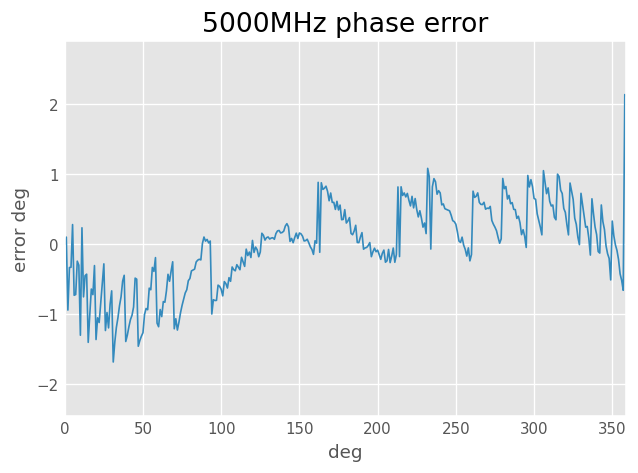

In [13]:
s2p_ref = rf.Network('data_20220922/A1B1_r2_5GHz_cal_deg' + str(0)+ '.s2p')
phase_diff = [0]
for deg in range(359):
    s2p = rf.Network('data_20220922/A1B1_r2_5GHz_cal_deg' + str(deg+1)+ '.s2p')
    # 第36个频点的S21
    diff = s2p.s[300:301,1,0][0]/s2p_ref.s[300:301,1,0][0]
    phase_diff.append(diff)
    # s2p_ref = s2p

lin_phase = np.angle(phase_diff, deg=True)
lin_phase_unwrap = np.unwrap(lin_phase, period=360)
# plt.plot(lin_phase_unwrap)
lst = list(range(0,360))
plt.plot(lin_phase_unwrap-lst)
plt.xlabel('deg')
plt.ylabel('error deg')
plt.title('5000MHz phase error')

2600MHz。2GHz-6GHz,401个点，10Mhz步进，所以，2600MHz就是第61个频点。经过校准箱校准后，且明确测试频点2600M。

Text(0.5, 1.0, '2600MHz phase error')

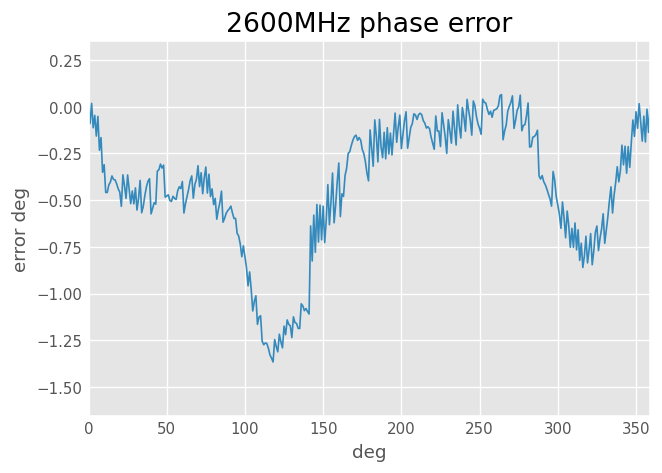

In [41]:
s2p_ref = rf.Network('data_20220923/A1B1_r3_deg' + str(0)+ '.s2p')
phase_diff = [0]
for deg in range(359):
    s2p = rf.Network('data_20220923/A1B1_r3_deg' + str(deg+1)+ '.s2p')
    # 第36个频点的S21
    diff = s2p.s[60:61,1,0][0]/s2p_ref.s[60:61,1,0][0]
    phase_diff.append(diff)
    # s2p_ref = s2p

lin_phase = np.angle(phase_diff, deg=True)
lin_phase_unwrap = np.unwrap(lin_phase, period=360)
# plt.plot(lin_phase_unwrap)
lst = list(range(0,360))
plt.plot(lin_phase_unwrap-lst)
plt.xlabel('deg')
plt.ylabel('error deg')
plt.title('2600MHz phase error')

Text(0.5, 1.0, '2350MHz phase error')

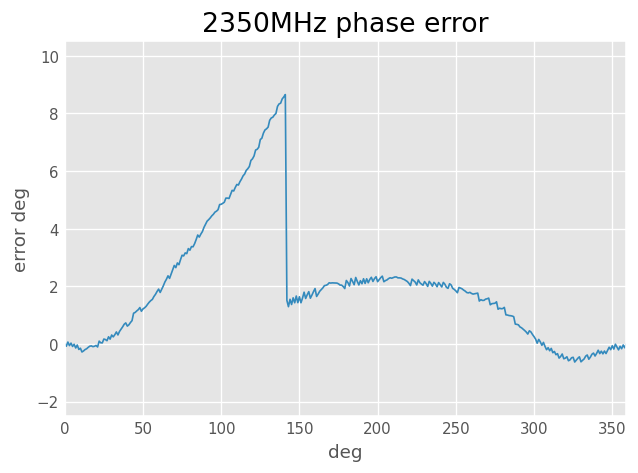

In [43]:
s2p_ref = rf.Network('data_20220923/A1B1_r3_deg' + str(0)+ '.s2p')
phase_diff = [0]
for deg in range(359):
    s2p = rf.Network('data_20220923/A1B1_r3_deg' + str(deg+1)+ '.s2p')
    # 第36个频点的S21
    diff = s2p.s[35:36,1,0][0]/s2p_ref.s[35:36,1,0][0]
    phase_diff.append(diff)
    # s2p_ref = s2p

lin_phase = np.angle(phase_diff, deg=True)
lin_phase_unwrap = np.unwrap(lin_phase, period=360)
# plt.plot(lin_phase_unwrap)
lst = list(range(0,360))
plt.plot(lin_phase_unwrap-lst)
plt.xlabel('deg')
plt.ylabel('error deg')
plt.title('2350MHz phase error')

Text(0.5, 1.0, '3600MHz phase error')

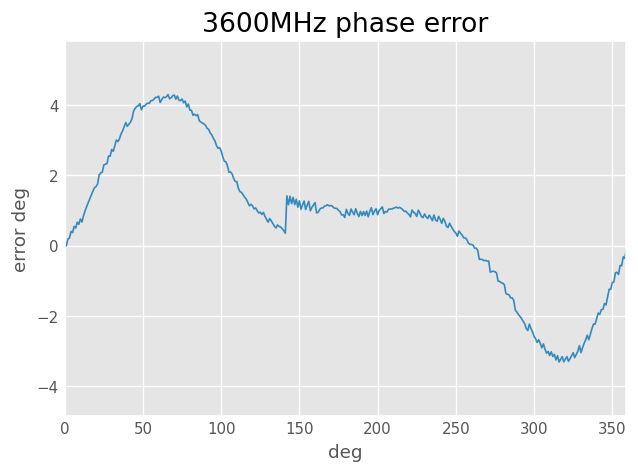

In [42]:
s2p_ref = rf.Network('data_20220923/A1B1_r3_deg' + str(0)+ '.s2p')
phase_diff = [0]
for deg in range(359):
    s2p = rf.Network('data_20220923/A1B1_r3_deg' + str(deg+1)+ '.s2p')
    # 第36个频点的S21
    diff = s2p.s[160:161,1,0][0]/s2p_ref.s[160:161,1,0][0]
    phase_diff.append(diff)
    # s2p_ref = s2p

lin_phase = np.angle(phase_diff, deg=True)
lin_phase_unwrap = np.unwrap(lin_phase, period=360)
# plt.plot(lin_phase_unwrap)
lst = list(range(0,360))
plt.plot(lin_phase_unwrap-lst)
plt.xlabel('deg')
plt.ylabel('error deg')
plt.title('3600MHz phase error')